# Experiments of StationSim to get input data for Emulators
    authors: MK (modified from AW's original stationsim experiements)
    created: Mar 2020
    version: 0.1 (jupyter)

# Imports

#### Import Model

In [1]:
import numpy as np
from sys import path
path.append('..')
from stationsim.stationsim_model_MK import Model
#generate the sensors
W = 200
H = 50
model_params = { 'width': W, 'height': H }
model = Model(**model_params)
Num_sensors = 10

../stationsim/stationsim_model_MK.py:34: UserWarning: The seaborn module is not available. If you try to create kde plots for this model (i.e. a wiggle map or density map) then it will fail.
  warnings.warn("The seaborn module is not available. If you try to create kde plots for this model (i.e. a wiggle map or density map) then it will fail.")


#### Time stamp for files

In [ ]:
from time import strftime
id = strftime('%y%m%d_%H%M%S')

#### Consistent random numbers

In [ ]:
from numpy.random import seed
seed(1)

## Experiment to generate the data for emulators

We run a loop of modelling to generate inputs data for emulators

In [2]:
#next, run this block to generate another set of data, which will be use for evaluation of the emulator
Num_reps = 30
#for pop0 in range(100,400,100):
for pop0 in [200]:
 
    print('Population= ',pop0)
    
    df0 = np.zeros((1,13))
    for rep in range(Num_reps):
        model = Model(pop_total=pop0)
        for step_id0 in range(model.step_limit):
            model.step()
            new_df0=[step_id0,np.mean(model.steps_delay),np.mean([agent.history_collisions for agent in model.agents])]
            #print(model.steps_delay)
            count_total=0
            for sensor0 in range(Num_sensors):
                count_sensor=0
                LBD = sensor0 * W/Num_sensors
                UBD = sensor0 * W/Num_sensors + W/Num_sensors
                #print('LBD=',LBD,', UBD= ',UBD)
                for agent in model.agents: 
                    if agent.location[0] > LBD and agent.location[0] < UBD:
                        #print(agent.location[0])
                        count_sensor += 1
                new_df0 = np.append(new_df0, count_sensor)
                count_total += count_sensor
            df0 = np.vstack((df0,new_df0))
    df0 = df0[1:,]
    filename = '../data/raw/df_pop_'+ str(pop0)+'_v6.csv'
    np.savetxt(filename, df0, delimiter=',', fmt=['%d' , '%.4f','%.4f','%d','%d','%d','%d','%d','%d','%d','%d','%d','%d'], header='Time,Delay,Collisions,Sensor0,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9')
                                 

Population=  200


/Users/mkie815/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mkie815/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [3]:
#next, run this block to generate another set of data, which will be use for evaluation of the emulator
Num_reps = 1
#for pop0 in range(100,400,100):
for pop0 in [200]:
 
    print('Population= ',pop0)
    
    df0 = np.zeros((1,13))
    for rep in range(Num_reps):
        model = Model(pop_total=pop0)
        for step_id0 in range(model.step_limit):
            model.step()
            new_df0=[step_id0,np.mean(model.steps_delay),np.mean([agent.history_collisions for agent in model.agents])]
            #print(model.steps_delay)
            count_total=0
            for sensor0 in range(Num_sensors):
                count_sensor=0
                LBD = sensor0 * W/Num_sensors
                UBD = sensor0 * W/Num_sensors + W/Num_sensors
                #print('LBD=',LBD,', UBD= ',UBD)
                for agent in model.agents: 
                    if agent.location[0] > LBD and agent.location[0] < UBD:
                        #print(agent.location[0])
                        count_sensor += 1
                new_df0 = np.append(new_df0, count_sensor)
                count_total += count_sensor
            df0 = np.vstack((df0,new_df0))
    df0 = df0[1:,]
    filename = '../data/validate/df_pop_'+ str(pop0)+'_test_v6.csv'
    np.savetxt(filename, df0, delimiter=',', fmt=['%d' , '%.4f','%.4f','%d','%d','%d','%d','%d','%d','%d','%d','%d','%d'], header='Time,Delay,Collisions,Sensor0,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9')
                                 

Population=  200


In [21]:
max_speed = [agent.speed_max for agent in model.agents]
speed = [agent.speed for agent in model.agents]

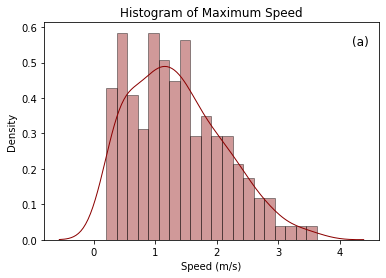

In [40]:
##### import matplotlib.pyplot as plt
import seaborn as sns


# Density Plot and Histogram of all arrival delays
sns.distplot(max_speed, hist=True, kde=True, 
             bins=int(20), color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

# Add labels
plt.text(4.2, 0.55, '(a)', fontsize=12)
plt.title('Histogram of Maximum Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Density')
plt.savefig('../figures/max_speed.pdf')


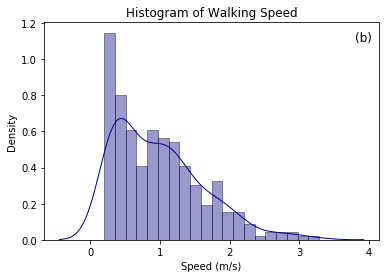

In [39]:
##### import matplotlib.pyplot as plt
import seaborn as sns


# Density Plot and Histogram of all arrival delays
sns.distplot(speed, hist=True, kde=True, 
             bins=int(20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

# Add labels
plt.text(3.8, 1.1, '(b)', fontsize=12)
plt.title('Histogram of Walking Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Density')
plt.savefig('../figures/speed.pdf')


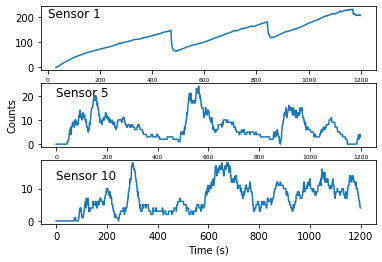

In [50]:


ax1 = plt.subplot(311)
plt.plot(df0[:,1])
plt.setp(ax1.get_xticklabels(), fontsize=6)
plt.text(0, 200, 'Sensor 1', fontsize=12)

ax2=plt.subplot(312)
plt.plot(df0[:,5])
plt.setp(ax2.get_xticklabels(), fontsize=6)
plt.text(0, 20, 'Sensor 5', fontsize=12)


ax3=plt.subplot(313)
plt.plot(df0[:,10])
plt.text(0, 13, 'Sensor 10', fontsize=12)


ax2.set_ylabel('Counts')
ax3.set_xlabel('Time (s)')

plt.savefig('../figures/Counts.pdf')





In [4]:

x = (1/50)+1/40 + 1/30+1/20+1/10
print(x)
print(5/x)

0.22833333333333336
21.8978102189781
